In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("D:\\SEMESTER 5\\CSE303 ML\\diabetes.csv")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


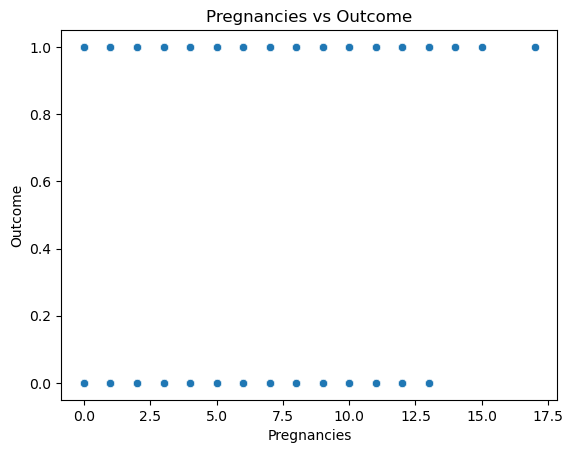

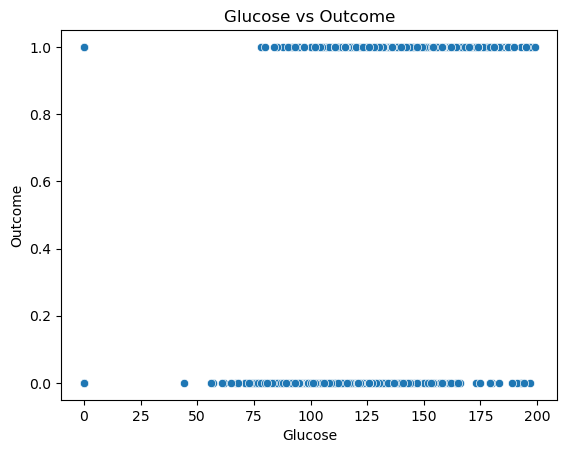

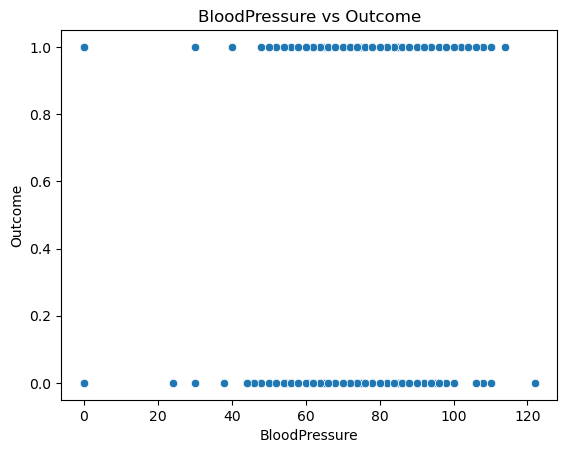

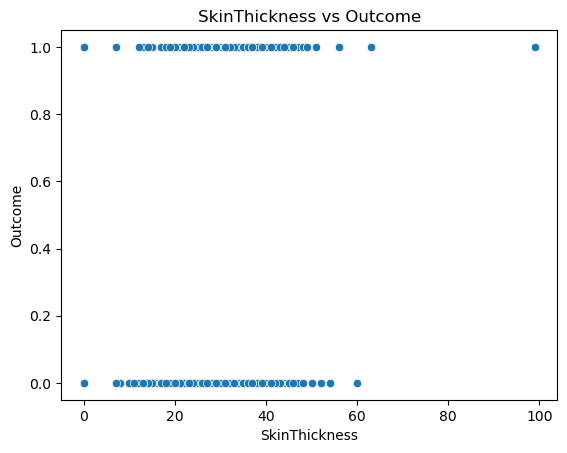

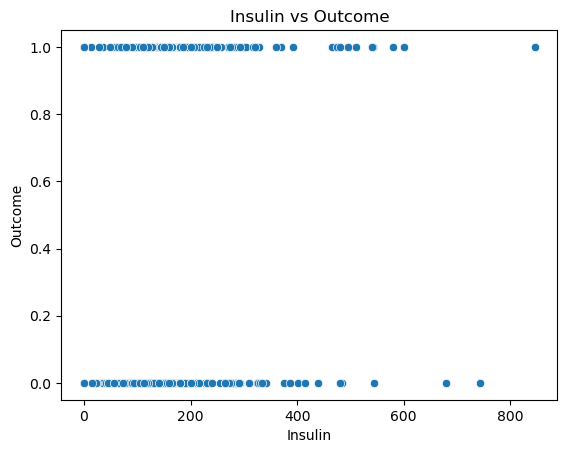

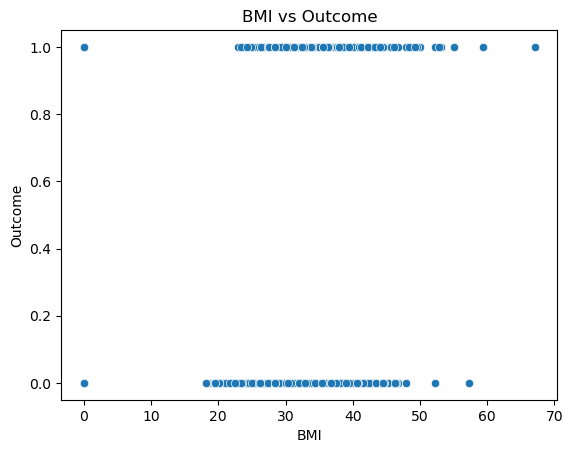

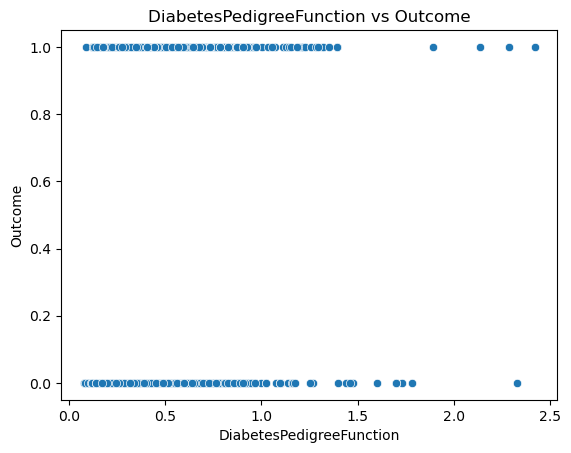

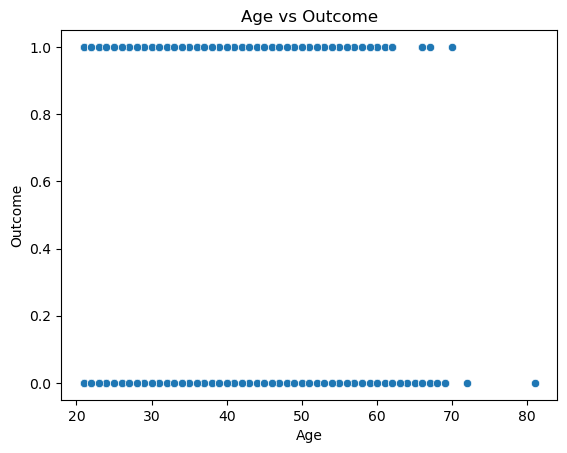

In [16]:
for col in df.columns[:-1]:
    sns.scatterplot(x=col, y='Outcome', data=df)
    plt.title(f"{col} vs Outcome")
    plt.show()

In [18]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
predictions = logmodel.predict(X_test)

In [29]:
from sklearn.metrics import classification_report

In [30]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.79      0.80        99\n           1       0.64      0.67      0.65        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.73      0.73       154\nweighted avg       0.75      0.75      0.75       154\n'

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test, predictions)

array([[78, 21],
       [18, 37]], dtype=int64)

In [33]:
 from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,predictions)

0.7467532467532467

Key Questions / Analysis / Interpretation to be Evaluated

**Q1. Which features have the highest impact? How is this validated?**  
- Glucose, BMI, and age often most important.  
- Validated using feature importance or coefficients.  
- Feature selection confirms significance.  

**Q2. What does the confusion matrix reveal?**  
- True positives/negatives, false positives/negatives.  
- Shows detailed prediction performance.  
- Important in medical predictions.  

**Q3. How does adjusting threshold affect results?**  
- Lower threshold → higher recall (more positives detected).  
- Higher threshold → higher precision (fewer false alarms).  
- Choice depends on application needs.  

**Q4. Why is ROC-AUC better than accuracy here?**  
- Accuracy misleads with imbalanced data.  
- ROC-AUC shows separation ability.  
- Higher AUC = better performance.  

**Q5. Is the model biased toward one class?**  
- Often predicts majority class more.  
- Detected using precision-recall.  
- Fixed with oversampling/weights.  

**Q6. How well does the model generalize?**  
- Checked via cross-validation.  
- Stable performance = good generalization.  
- Prevents overfitting to single split.  


Supplementry Problem: Fraud Detection

Class Distribution:
label
0    1954
1      46
Name: count, dtype: int64

After SMOTE balancing:
label
0    1368
1    1368
Name: count, dtype: int64

Confusion Matrix:
[[530  56]
 [  6   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       586
           1       0.12      0.57      0.21        14

    accuracy                           0.90       600
   macro avg       0.56      0.74      0.57       600
weighted avg       0.97      0.90      0.93       600

ROC-AUC Score: 0.804


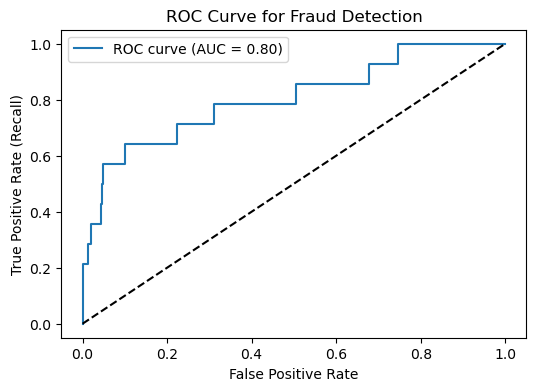

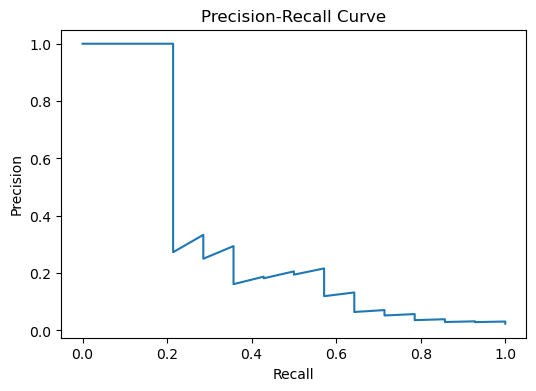

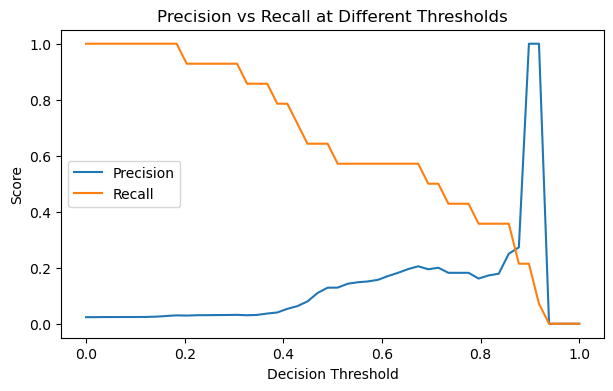

Higher threshold → fewer positives (high precision, low recall)
Lower threshold → more positives (high recall, low precision)
In fraud detection: prefer high recall (catch all frauds), but balance with precision to avoid false alerts.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_recall_curve
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
n_samples = 2000

data = pd.DataFrame({
    'amount': np.random.exponential(100, n_samples),
    'is_international': np.random.choice([0, 1], size=n_samples, p=[0.9, 0.1]),
    'card_present': np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3]),
    'time_since_last_txn': np.random.exponential(60, n_samples),
    'txn_count_24h': np.random.poisson(5, n_samples),
    'avg_txn_amt_24h': np.random.normal(80, 25, n_samples),
    'previous_fraud_flag': np.random.choice([0, 1], size=n_samples, p=[0.97, 0.03])
})

# True label (fraud) — rare class, depends on suspicious patterns
data['label'] = (
    (data['is_international'] == 1) & 
    (data['amount'] > 200)
).astype(int)

# Add random noise (to make it realistic)
data.loc[np.random.rand(n_samples) < 0.01, 'label'] = 1

print("Class Distribution:")
print(data['label'].value_counts())

X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE balancing:")
print(y_train_res.value_counts())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train_res)

y_prob = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Fraud Detection")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

thresholds = np.linspace(0, 1, 50)
precisions, recalls = [], []

for t in thresholds:
    preds = (y_prob >= t).astype(int)
    cm = confusion_matrix(y_test, preds)
    tp = cm[1,1]
    fp = cm[0,1]
    fn = cm[1,0]
    precisions.append(tp / (tp + fp + 1e-9))
    recalls.append(tp / (tp + fn + 1e-9))

plt.figure(figsize=(7, 4))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall at Different Thresholds")
plt.legend()
plt.show()

print("Higher threshold → fewer positives (high precision, low recall)")
print("Lower threshold → more positives (high recall, low precision)")
print("In fraud detection: prefer high recall (catch all frauds), but balance with precision to avoid false alerts.")
